10


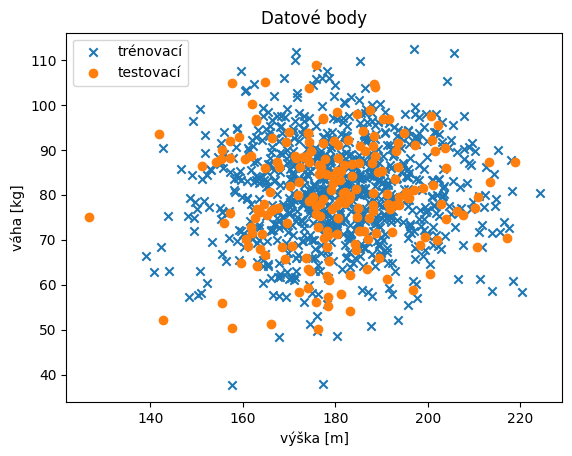

            vyska        vaha         vaha2        vyska2            vv  \
count  800.000000  800.000000    800.000000    800.000000    800.000000   
mean   180.682340   80.620391   6627.564159  32866.759972  14571.034533   
std     14.863649   11.317102   1816.763553   5394.612766   2380.903837   
min    139.140859   37.599646   1413.733388  19360.178581   5930.879092   
25%    170.714076   73.341317   5378.949404  29143.297153  12997.495137   
50%    180.288009   80.445461   6471.473028  32503.767370  14505.480211   
75%    190.340541   88.318722   7800.198023  36229.523339  16143.650476   
max    224.183790  112.331630  12618.395123  50258.371582  22956.242093   

              bmi  
count  800.000000  
mean    25.185934  
std      5.437578  
min     12.056140  
25%     21.400476  
50%     24.669069  
75%     28.313440  
max     44.310999  
            vyska        vaha         vaha2        vyska2            vv  \
count  200.000000  200.000000    200.000000    200.000000    200.0000

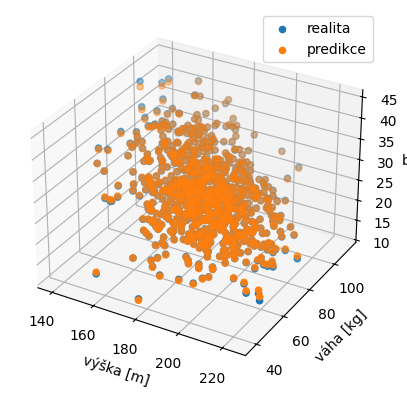

In [28]:
# generování dat
import numpy as np
import pandas as pd
from numpy.random import randn

N = 1000  # počet datových bodů


# pomocí gausovského rozdělení nagenerujeme body v prostoru váha-výška
# generování váhy v kg
def generuj_vahu(vaha_prumer=80, vaha_sigma=12, kolik=100):
    vaha = vaha_prumer + randn(kolik) * vaha_sigma
    vaha[vaha < vaha_prumer - 4 * vaha_sigma] = (
        vaha_prumer - 4 * vaha_sigma
    )  # orezani nepravdepodobnych hodnot - podvaha
    vaha[vaha > vaha_prumer + 4 * vaha_sigma] = (
        vaha_prumer + 4 * vaha_sigma
    )  # orezani nepravdepodobnych hodnot - nadpodvaha
    return vaha


# generování výšky v cm
def generuj_vysku(vyska_prumer=180, vyska_sigma=15, kolik=100):
    vyska = vyska_prumer + randn(kolik) * vyska_sigma
    vyska[vyska < vyska_prumer - 4 * vyska_sigma] = vyska_prumer - 4 * vyska_sigma
    vyska[vyska > vyska_prumer + 4 * vyska_sigma] = vyska_prumer + 4 * vyska_sigma
    return vyska


vaha = generuj_vahu(kolik=N)
vyska = generuj_vysku(kolik=N)
vaha = vaha
vyska = vyska
vaha2 = vaha**2
vyska2 = vyska**2
vv = vaha * vyska
bmi = vaha / (vyska / 100) ** 2

data = {
    "vyska": vyska,
    "vaha": vaha,
    "vaha2": vaha2,
    "vyska2": vyska2,
    "vv": vv,
    "bmi": bmi,
}
df = pd.DataFrame(data)  #
# df.to_csv('data_lide.csv', index = False)
df.head(10)

%matplotlib inline
promichano_index = df.index.to_list()
np.random.shuffle(promichano_index)

trenovaci_data_velikost = int(len(df) * 0.80)  # vezmeme 80 % pro nauceni modelu
print(df.index[10])
trenovaci_data = df.filter(
    promichano_index[:trenovaci_data_velikost], axis=0
)  # vem nahodne indexy
testovaci_data = df.filter(
    promichano_index[trenovaci_data_velikost:], axis=0
)  # vem nahodne indexy
import matplotlib.pyplot as plt

plt.scatter(
    trenovaci_data["vyska"], trenovaci_data["vaha"], marker="x", label="trénovací"
)
plt.scatter(
    testovaci_data["vyska"], testovaci_data["vaha"], marker="o", label="testovací"
)
plt.title("Datové body")
plt.xlabel("výška [m]")
plt.ylabel("váha [kg]")
plt.legend()
plt.show()

# statisticke ukazatele
print(trenovaci_data.describe())
print(testovaci_data.describe())


# from sklearn.linear_model import LinearRegression


# model = LinearRegression()
# # vytvoreni modelu

# model.fit(trenovaci_data[["vyska", "vaha", "vaha2", "vyska2"]], trenovaci_data["bmi"])

import numpy.linalg as la

%matplotlib inline

# priprava dat pro linearni regresi
y = trenovaci_data["bmi"]
X_t = np.array(
    (
        np.ones(y.shape),
        trenovaci_data["vyska"],
        trenovaci_data["vaha"],
        trenovaci_data["vaha"] ** 2,
        trenovaci_data["vyska"] ** 2,
        trenovaci_data["vaha"] * trenovaci_data["vyska"],
    )
)
X = X_t.transpose()

# sestaveni matice a prave strany
A = X_t @ X  # np.dot(X^T,X)
b = X_t @ y
# vypocet koeficientu resenim soustavy lin. rovnic
koeficienty = la.solve(A, b)
bmi_hat_trenovaci = X @ koeficienty  # vypocet predikce na trenovacich datech


X_test_t = np.array(
    (
        np.ones(len(testovaci_data)),
        testovaci_data["vyska"],
        testovaci_data["vaha"],
        testovaci_data["vaha"] ** 2,
        testovaci_data["vyska"] ** 2,
        testovaci_data["vaha"] * testovaci_data["vyska"],
    )
)
X_test = X_test_t.transpose()
bmi_hat_testovaci = X_test @ koeficienty

# vykresleni predikce a reality pro trenovaci data
ax = plt.axes(projection="3d")
ax.scatter3D(
    trenovaci_data["vyska"],
    trenovaci_data["vaha"],
    trenovaci_data["bmi"],
    label="realita",
)
ax.scatter3D(
    trenovaci_data["vyska"], trenovaci_data["vaha"], bmi_hat_trenovaci, label="predikce"
)
ax.legend()
ax.set_xlabel("výška [m]")
ax.set_ylabel("váha [kg]")
ax.set_zlabel("bmi")

# vypocet chyby
mse_ls_modelu_trenovaci = ((trenovaci_data["bmi"] - bmi_hat_trenovaci) ** 2).mean()
mse_ls_modelu_testovaci = ((testovaci_data["bmi"] - bmi_hat_testovaci) ** 2).mean()

print(f"Chyba na trenovacich datech {mse_ls_modelu_trenovaci}")
print(f"Chyba na testovacich datech {mse_ls_modelu_testovaci}")